In [1]:
import pandas as pd

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import matplotlib.pyplot as plt

In [7]:
#load the Dataset
df = pd.read_csv('/content/drive/MyDrive/Project_8/pre_processed_data.csv')

In [11]:
df.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country', 'has_hourly', 'has_budget',
       'month_year', 'category', 'generated_category', 'final_category'],
      dtype='object')

In [12]:
df.isna().sum()

,0
title,0
link,0
published_date,0
is_hourly,0
hourly_low,0
hourly_high,0
budget,0
country,0
has_hourly,0
has_budget,0


In [15]:
df.dtypes

,0
title,object
link,object
published_date,"datetime64[ns, UTC]"
is_hourly,bool
hourly_low,float64
hourly_high,float64
budget,float64
country,object
has_hourly,int64
has_budget,int64


In [13]:
# Convert date column to datetime format
df['published_date'] = pd.to_datetime(df['published_date'])

Aggregte Job postings per Month

In [19]:
#Count job postings per month per category
monthly_trends = df.groupby(['month_year', 'final_category'])['title'].count().reset_index()

In [20]:
# Display trends
print(monthly_trends.head())

  month_year  final_category  title
0    2023-11       architect      1
1    2023-12  content writer      1
2    2023-12       developer      3
3    2023-12          editor      1
4    2023-12       marketing      2


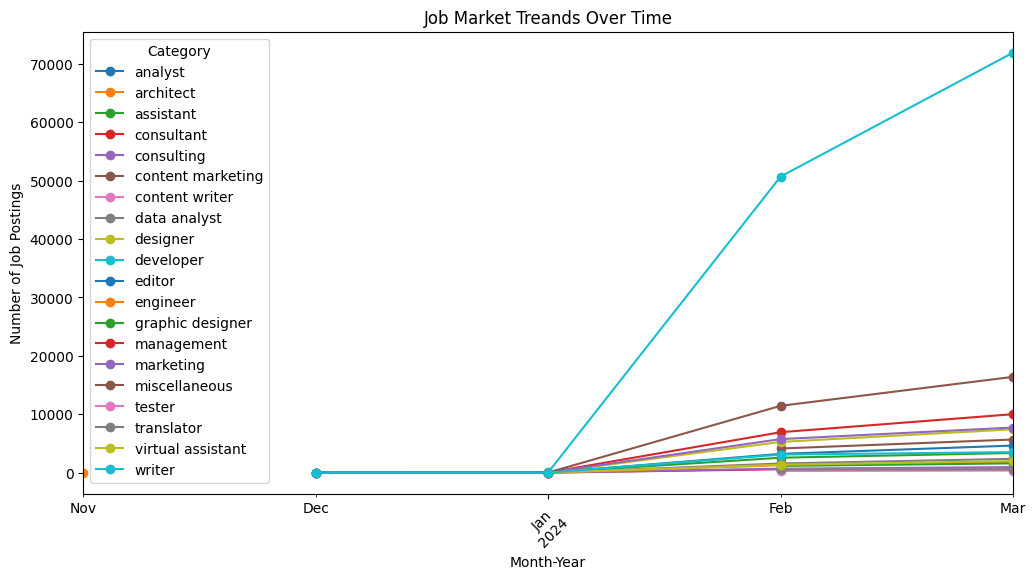

In [22]:
# Pivot data for visualization
trend_pivot = monthly_trends.pivot(index='month_year', columns='final_category', values='title')

# Plot job trends
trend_pivot.plot(figsize=(12,6), marker ='o')
plt.xlabel('Month-Year')
plt.ylabel('Number of Job Postings')
plt.title('Job Market Treands Over Time')
plt.legend(title = 'Category')
plt.xticks(rotation = 45)
plt.show()

Automate Monthly Updates

In [24]:
from flask import Flask, jsonify

app =  Flask(__name__)

@app.route('/track_market_dynamics', methods=['GET'])

def get_market_trends():
  ''' API endpoint for job market trends'''
  monthly_trends_json = monthly_trends.to_dict(orient='records')

  return jsonify(monthly_trends_json)


if __name__ == '__main__':
  app.run(debug=True)

ValueError: URL rule 'track_market_dynamics' must start with a slash.